In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
df = pd.read_csv (r'C:\Users\LikwaGear\Desktop\fake\emails.csv',encoding='latin-1')
df.dropna().head()

,Message
0,Here is our forecast\n\n \n
1,Traveling to have a business meeting takes the...
2,test successful. way to go!!!\n
3,"Randy,\n\n Can you send me a schedule of the s..."
4,Let's shoot for Tuesday at 11:45. \n


In [3]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df['Cleaned emails'] = df['Message'].apply(clean)
df.head()

,Message,Cleaned emails
0,Here is our forecast\n\n \n,Here is our forecast
1,Traveling to have a business meeting takes the...,Traveling to have a business meeting takes the...
2,test successful. way to go!!!\n,test successful way to go
3,"Randy,\n\n Can you send me a schedule of the s...",Randy Can you send me a schedule of the salary...
4,Let's shoot for Tuesday at 11:45. \n,Let s shoot for Tuesday at


In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Error loading punkt: <urlopen error [WinError 10053] An
[nltk_data]     established connection was aborted by the software in
[nltk_data]     your host machine>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LikwaGear\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
         newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned emails'].apply(token_stop_pos)
df.head()

,Message,Cleaned emails,POS tagged
0,Here is our forecast\n\n \n,Here is our forecast,"[(forecast, n)]"
1,Traveling to have a business meeting takes the...,Traveling to have a business meeting takes the...,"[(Traveling, v), (business, n), (meeting, n), ..."
2,test successful. way to go!!!\n,test successful way to go,"[(test, r), (successful, a), (way, n), (go, v)]"
3,"Randy,\n\n Can you send me a schedule of the s...",Randy Can you send me a schedule of the salary...,"[(Randy, n), (send, v), (schedule, n), (salary..."
4,Let's shoot for Tuesday at 11:45. \n,Let s shoot for Tuesday at,"[(Let, v), (shoot, v), (Tuesday, n)]"


In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Message,Cleaned emails,POS tagged,Lemma
0,Here is our forecast\n\n \n,Here is our forecast,"[(forecast, n)]",forecast
1,Traveling to have a business meeting takes the...,Traveling to have a business meeting takes the...,"[(Traveling, v), (business, n), (meeting, n), ...",Traveling business meeting take fun trip Esp...
2,test successful. way to go!!!\n,test successful way to go,"[(test, r), (successful, a), (way, n), (go, v)]",test successful way go
3,"Randy,\n\n Can you send me a schedule of the s...",Randy Can you send me a schedule of the salary...,"[(Randy, n), (send, v), (schedule, n), (salary...",Randy send schedule salary level everyone sc...
4,Let's shoot for Tuesday at 11:45. \n,Let s shoot for Tuesday at,"[(Let, v), (shoot, v), (Tuesday, n)]",Let shoot Tuesday


In [9]:
df[['Message','Lemma']]

,Message,Lemma
0,Here is our forecast\n\n \n,forecast
1,Traveling to have a business meeting takes the...,Traveling business meeting take fun trip Esp...
2,test successful. way to go!!!\n,test successful way go
3,"Randy,\n\n Can you send me a schedule of the s...",Randy send schedule salary level everyone sc...
4,Let's shoot for Tuesday at 11:45. \n,Let shoot Tuesday
5,"Greg,\n\n How about either next Tuesday or Thu...",Greg either next Tuesday Thursday Phillip
6,Please cc the following distribution list with...,Please cc following distribution list update...
7,any morning between 10 and 11:30\n,morning
8,1. login: pallen pw: ke9davis\n\n I don't thi...,login pallen pw ke davis think require ISP s...
9,---------------------- Forwarded by Phillip K ...,Forwarded Phillip K Allen HOU ECT PM Buckner...


In [10]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

In [11]:
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

In [12]:
# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [13]:
sent_result = pd.DataFrame(df[['Message', 'Lemma']])

In [14]:
sent_result['Subjectivity'] = sent_result['Lemma'].apply(getSubjectivity) 
sent_result['Polarity'] = sent_result['Lemma'].apply(getPolarity) 
sent_result['Analysis'] = sent_result['Polarity'].apply(analysis)
sent_result.head()

,Message,Lemma,Subjectivity,Polarity,Analysis
0,Here is our forecast\n\n \n,forecast,0.000000,0.00,Neutral
1,Traveling to have a business meeting takes the...,Traveling business meeting take fun trip Esp...,0.623333,0.17,Positive
2,test successful. way to go!!!\n,test successful way go,0.950000,0.75,Positive
3,"Randy,\n\n Can you send me a schedule of the s...",Randy send schedule salary level everyone sc...,0.000000,0.00,Neutral
4,Let's shoot for Tuesday at 11:45. \n,Let shoot Tuesday,0.000000,0.00,Neutral


In [15]:
sent_result.to_excel('sent_result.xls')

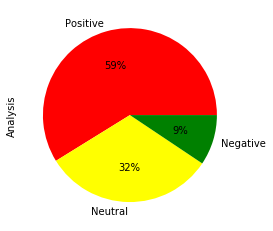

In [16]:
sent_result.Analysis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])